In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

import math



In [2]:
# import data

loanData=pd.read_csv('./loans.csv')

# display first 5 records

loanData.head(5)

,Customer ID,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Postcode,Income,Own home,CCJs,Loan amount,Outcome
0,945780,Miah,19,F,2,Unemployed,UK,0,TA3 7SH,45500,Rent,1,13234,Paid
1,747989,Hollis,66,F,13,Unemployed,UK,1080,WV6 8SU,18000,Own,0,5561,Paid
2,790344,Barker,48,F,4,Self Employed,UK,3690,BT15 5HG,47500,Rent,1,28288,Paid
3,597668,Titford,67,F,47,Self Employed,UK,6560,GU10 3NH,36000,Mortgage,0,30199,Paid
4,794971,Berry,70,M,8,Self Employed,UK,9100,GL6 6UB,50500,Own,0,35078,Paid


In [3]:
# check data types
loanData.dtypes

Customer ID           int64
Fictional Surname    object
Age                   int64
Gender               object
Years at address      int64
Employment status    object
Country              object
Current debt          int64
Postcode             object
Income                int64
Own home             object
CCJs                  int64
Loan amount           int64
Outcome              object
dtype: object

In [4]:
# check shape
loanData.shape

(2000, 14)

###################################

#       DATA PREPARATION

###################################

### remove unused columns

In [5]:
loanData=loanData.drop(columns=['Customer ID','Fictional Surname','Country','Postcode'])
loanData.head(5)

,Age,Gender,Years at address,Employment status,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,19,F,2,Unemployed,0,45500,Rent,1,13234,Paid
1,66,F,13,Unemployed,1080,18000,Own,0,5561,Paid
2,48,F,4,Self Employed,3690,47500,Rent,1,28288,Paid
3,67,F,47,Self Employed,6560,36000,Mortgage,0,30199,Paid
4,70,M,8,Self Employed,9100,50500,Own,0,35078,Paid


### check for null values

In [6]:
loanData.isnull().sum()

Age                  0
Gender               0
Years at address     0
Employment status    0
Current debt         0
Income               0
Own home             0
CCJs                 0
Loan amount          0
Outcome              0
dtype: int64

### check for nan values

In [7]:
loanData.isna().sum()

Age                  0
Gender               0
Years at address     0
Employment status    0
Current debt         0
Income               0
Own home             0
CCJs                 0
Loan amount          0
Outcome              0
dtype: int64

### check for duplicates and drop them

In [8]:
loanData.duplicated()
loanData.drop_duplicates()

,Age,Gender,Years at address,Employment status,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,19,F,2,Unemployed,0,45500,Rent,1,13234,Paid
1,66,F,13,Unemployed,1080,18000,Own,0,5561,Paid
2,48,F,4,Self Employed,3690,47500,Rent,1,28288,Paid
3,67,F,47,Self Employed,6560,36000,Mortgage,0,30199,Paid
4,70,M,8,Self Employed,9100,50500,Own,0,35078,Paid
...,...,...,...,...,...,...,...,...,...,...
1995,60,F,4,Self Employed,2900,22500,Own,1,15725,Paid
1996,24,F,7,Self Employed,5130,38000,Own,0,35911,Paid
1997,34,M,5,Unemployed,6530,41500,Own,2,6874,Paid
1998,52,F,2,Employed,930,32500,Own,0,5412,Paid


## Go through each column, graph the data, and perform exploratory analysis

### 1. Gender column

<AxesSubplot:title={'center':'Gender counts'}>

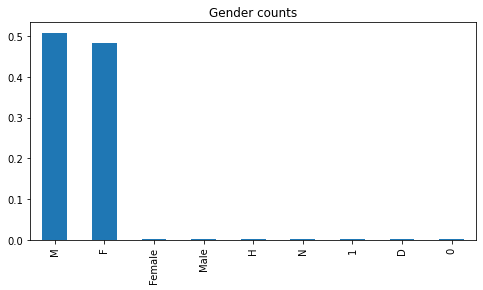

In [9]:

loanData['Gender'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Gender counts')


<AxesSubplot:title={'center':'Gender counts'}>

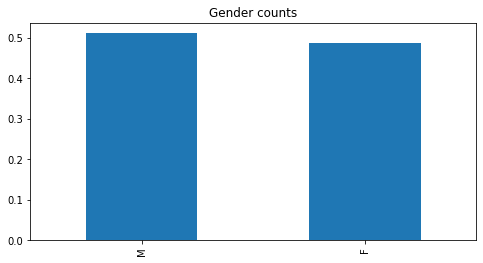

In [10]:

###########     clean gender data    ###############

loanData['Gender'].replace(['Female','Male','H','N','1','D','0'],['F','M','F','M','M','F','F'], inplace=True)
loanData['Gender'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Gender counts')


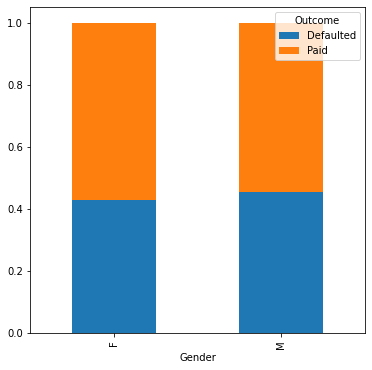

In [11]:
gender_vs_outcome=pd.crosstab(loanData['Gender'],loanData['Outcome'])
gender_vs_outcome.div(gender_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.show()

In [12]:
#########################################################
#########################################################
#########################################################



### 2. Employment status column

<AxesSubplot:title={'center':'Employment status counts'}>

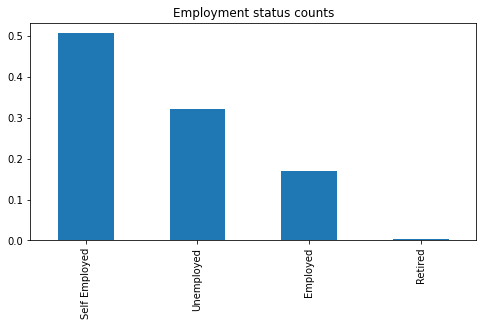

In [13]:

###########     Employment status graphs    ###############
emp=loanData[(loanData['Employment status']=='Retired')]
#print(emp)

loanData['Employment status'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Employment status counts')

<AxesSubplot:title={'center':'Employment status counts'}>

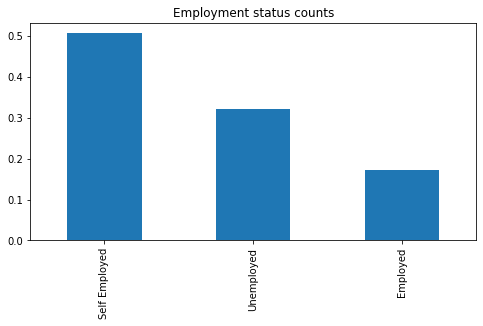

In [14]:

###########     clean employment status data    ###############

loanData['Employment status'].replace(['Retired'],['Employed'], inplace=True)
loanData['Employment status'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Employment status counts')

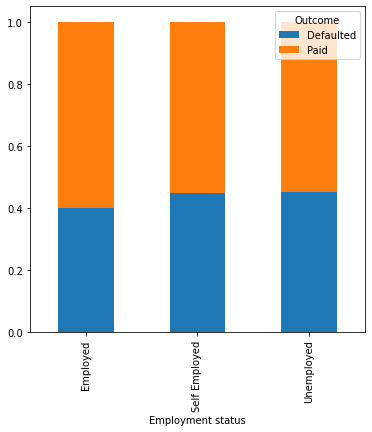

In [15]:
empStat_vs_outcome=pd.crosstab(loanData['Employment status'],loanData['Outcome'])
empStat_vs_outcome.div(empStat_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.show()

In [16]:
#################################################################
#################################################################
#################################################################




### 3. Own homes column


<AxesSubplot:title={'center':'Own home counts'}>

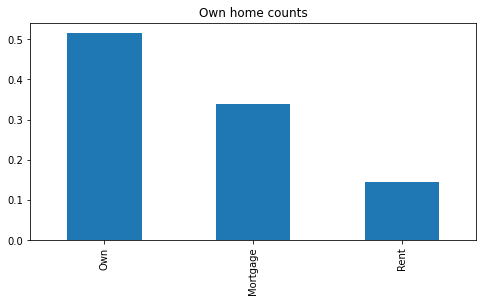

In [17]:

###########     Own homes graphs    ###############

loanData['Own home'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Own home counts')


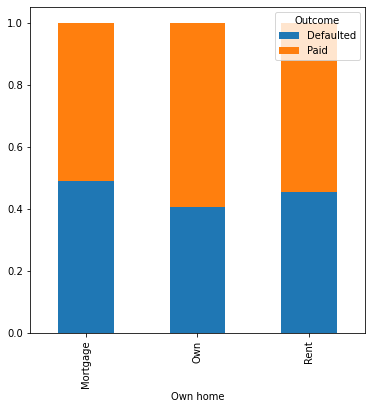

In [18]:
ownHome_vs_outcome=pd.crosstab(loanData['Own home'],loanData['Outcome'])
ownHome_vs_outcome.div(ownHome_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.show()

In [19]:
#################################################################
#################################################################
#################################################################




### 4. Outcome column 

<AxesSubplot:title={'center':'Outcome counts'}>

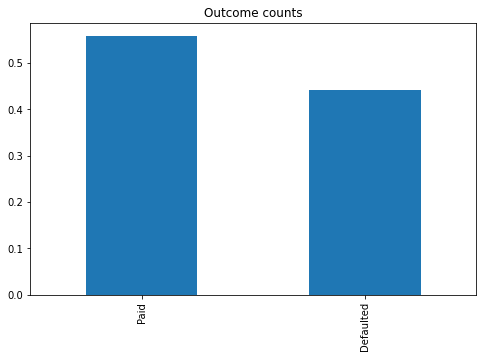

In [20]:

###########     Loan Outcome graphs    ###############

loanData['Outcome'].value_counts(normalize=True).plot.bar(figsize=(8,5),title='Outcome counts')


In [21]:
#################################################################
#################################################################
#################################################################



### 5. Age column

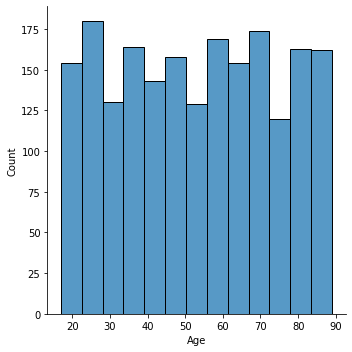

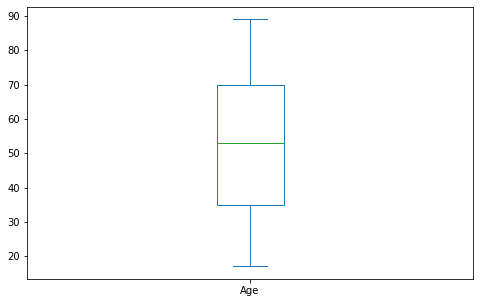

In [22]:
sns.displot(loanData['Age'])
plt.show()
loanData['Age'].plot.box(figsize=(8,5))
plt.show()

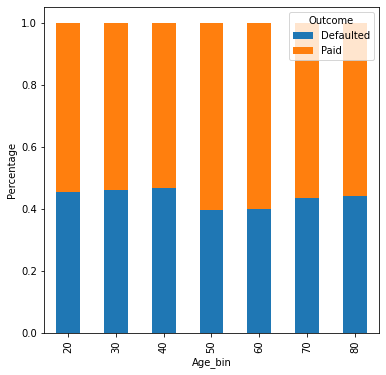

In [23]:
bins=[20,30,40,50,60,70,80,90]
ageBins=pd.DataFrame()
ageBins['Age_bin']=pd.cut(loanData['Age'],bins,labels=bins[:7])
age_vs_outcome=pd.crosstab(ageBins['Age_bin'],loanData['Outcome'])
age_vs_outcome.div(age_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

In [24]:
#################################################################
#################################################################
#################################################################



### 6. Years at address column

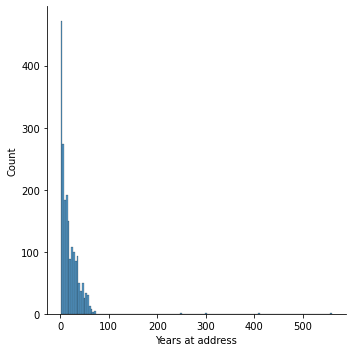

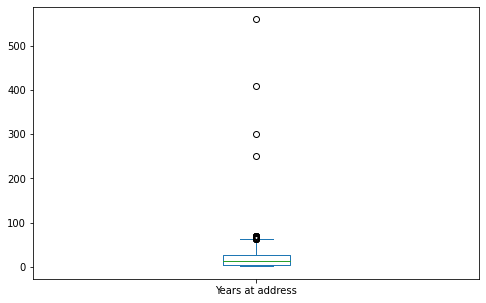

In [25]:
#   plot initial graphs

sns.displot(loanData['Years at address'])
plt.show()
loanData['Years at address'].plot.box(figsize=(8,5))
plt.show()

In [26]:
#####  THIS SECTION WAS RUN TWICE !!!!  #####

# find upper and lower bound

q3,q1=np.percentile(np.array(loanData['Years at address']),[75,25])
# print(q3,q1)
intrQuartRange=q3-q1
# print(intrQuartRange)
upperBound=q3+(1.5*intrQuartRange)
lowerBound=q1-(1.5*intrQuartRange)

loanData.loc[loanData['Years at address']>upperBound,'Years at address']=np.nan
loanData.loc[loanData['Years at address']<lowerBound,'Years at address']=np.nan

# confirm null values added
# print(loanData.isnull().sum())

# find mean
mean = math.floor(loanData['Years at address'].mean())

# replace null values with mean

loanData['Years at address'].fillna(mean,inplace=True)
# print(loanData.isnull().sum())




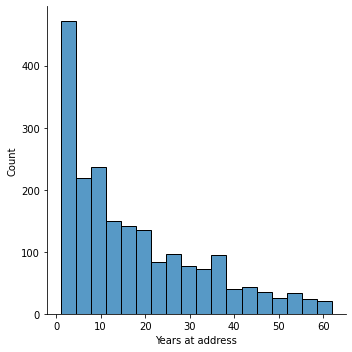

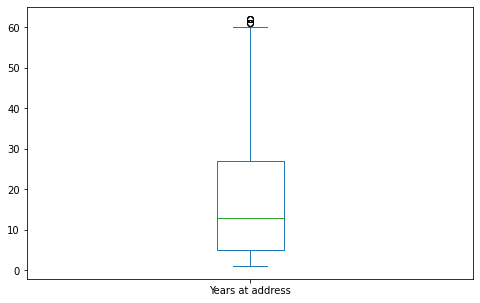

In [27]:
#   plot graphs with outliers removed

sns.displot(loanData['Years at address'])
plt.show()
loanData['Years at address'].plot.box(figsize=(8,5))
plt.show()

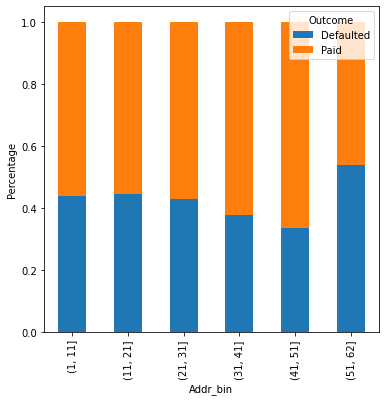

In [28]:
addrBins=np.linspace(min(loanData['Years at address']),max(loanData['Years at address']),7,dtype="int")
df=pd.DataFrame()
df['Addr_bin']=pd.cut(loanData['Years at address'],addrBins)
addr_vs_outcome=pd.crosstab(df['Addr_bin'],loanData['Outcome'])
addr_vs_outcome.div(addr_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

In [29]:
#################################################################
#################################################################
#################################################################



### 7. Current debt column

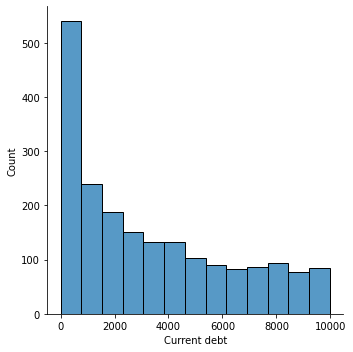

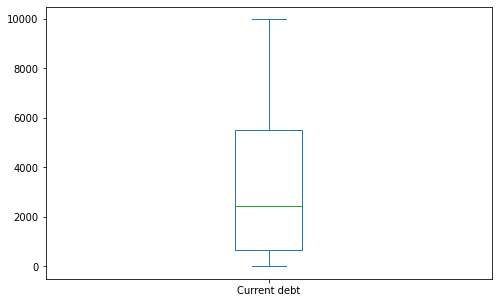

In [30]:
sns.displot(loanData['Current debt'])
plt.show()
loanData['Current debt'].plot.box(figsize=(8,5))
plt.show()

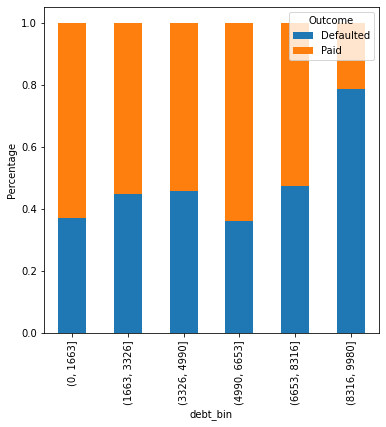

In [31]:
debtBins=np.linspace(min(loanData['Current debt']),max(loanData['Current debt']),7,dtype="int")
df=pd.DataFrame()
df['debt_bin']=pd.cut(loanData['Current debt'],debtBins)
debt_vs_outcome=pd.crosstab(df['debt_bin'],loanData['Outcome'])
debt_vs_outcome.div(debt_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

In [32]:
#################################################################
#################################################################
#################################################################

### 8. income column

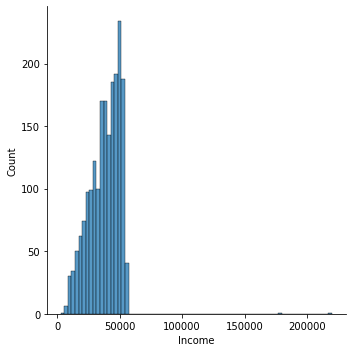

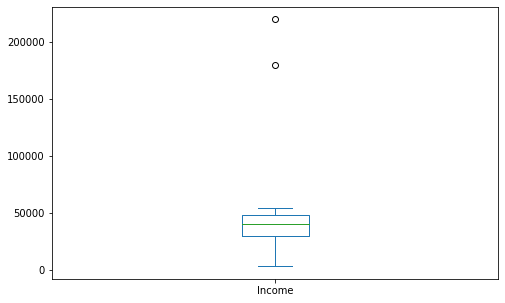

In [33]:
#####  plot initial graphs  #####
sns.displot(loanData['Income'])
plt.show()
loanData['Income'].plot.box(figsize=(8,5))
plt.show()

In [34]:
# find upper and lower bound

q3,q1=np.percentile(np.array(loanData['Income']),[75,25])
# print(q3,q1)
intrQuartRange=q3-q1
# print(intrQuartRange)
upperBound=q3+(1.5*intrQuartRange)
lowerBound=q1-(1.5*intrQuartRange)

loanData.loc[loanData['Income']>upperBound,'Income']=np.nan
loanData.loc[loanData['Income']<lowerBound,'Income']=np.nan

# confirm null values added
# print(loanData.isnull().sum())

# find mean
mean = math.floor(loanData['Income'].mean())

# replace null values with mean

loanData['Income'].fillna(mean,inplace=True)
# print(loanData.isnull().sum())


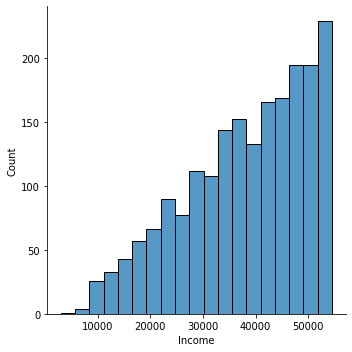

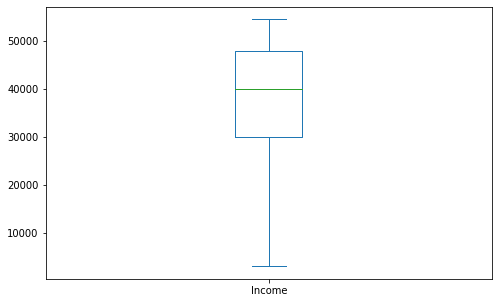

In [35]:
#####  plot graphs without outliers  #####
sns.displot(loanData['Income'])
plt.show()
loanData['Income'].plot.box(figsize=(8,5))
plt.show()

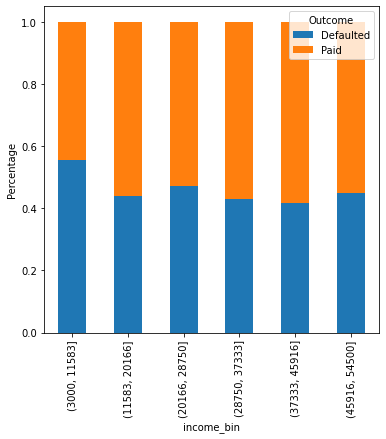

In [36]:
incomeBins=np.linspace(min(loanData['Income']),max(loanData['Income']),7,dtype="int")
df=pd.DataFrame()
df['income_bin']=pd.cut(loanData['Income'],incomeBins)
income_vs_outcome=pd.crosstab(df['income_bin'],loanData['Outcome'])
income_vs_outcome.div(income_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

In [37]:
#################################################################
#################################################################
#################################################################

### 9. CCJS column

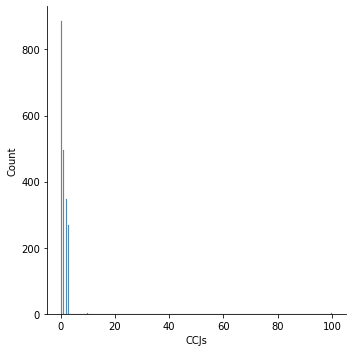

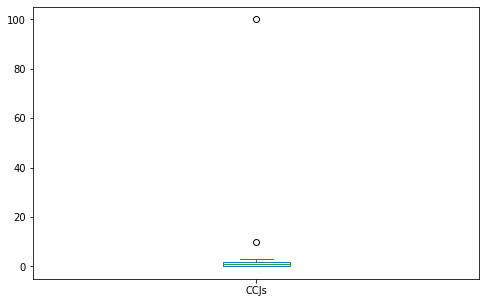

In [38]:

#####  plot initial graphs  #####
sns.displot(loanData['CCJs'])
plt.show()
loanData['CCJs'].plot.box(figsize=(8,5))
plt.show()

In [39]:
# find upper and lower bound

q3,q1=np.percentile(np.array(loanData['CCJs']),[75,25])
# # print(q3,q1)
intrQuartRange=q3-q1
# # print(intrQuartRange)
upperBound=q3+(1.5*intrQuartRange)
lowerBound=q1-(1.5*intrQuartRange)

loanData.loc[loanData['CCJs']>upperBound,'CCJs']=np.nan
loanData.loc[loanData['CCJs']<lowerBound,'CCJs']=np.nan

# confirm null values added
# print(loanData.isnull().sum())

# find mode
mode = loanData['CCJs'].mode()
# print(mode[0])

# replace null values with mean

loanData['CCJs'].fillna(mode[0],inplace=True)
print(loanData.isna().sum())

Age                  0
Gender               0
Years at address     0
Employment status    0
Current debt         0
Income               0
Own home             0
CCJs                 0
Loan amount          0
Outcome              0
dtype: int64


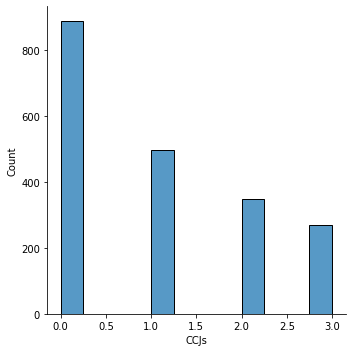

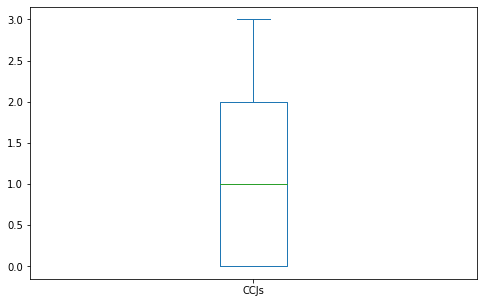

In [40]:

#####  plot adjusted graphs  #####
sns.displot(loanData['CCJs'])
plt.show()
loanData['CCJs'].plot.box(figsize=(8,5))
plt.show()


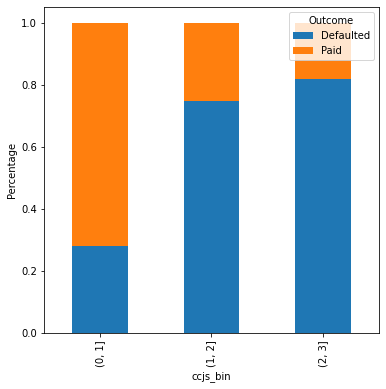

In [41]:
ccjsBins=[0,1,2,3]
df=pd.DataFrame()
df['ccjs_bin']=pd.cut(loanData['CCJs'],ccjsBins)
ccjs_vs_outcome=pd.crosstab(df['ccjs_bin'],loanData['Outcome'])
ccjs_vs_outcome.div(ccjs_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

In [42]:
#################################################################
#################################################################
#################################################################

### 10. Loan amount column

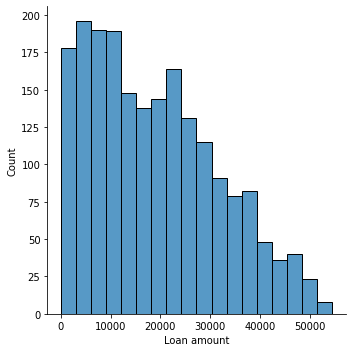

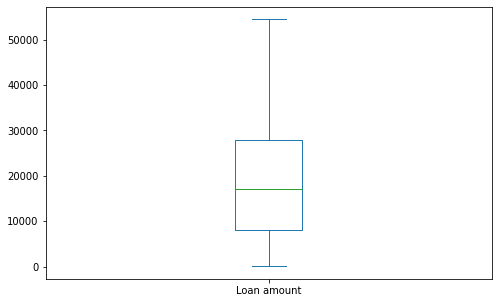

In [43]:

#####  plot initial graphs  #####
sns.displot(loanData['Loan amount'])
plt.show()
loanData['Loan amount'].plot.box(figsize=(8,5))
plt.show()

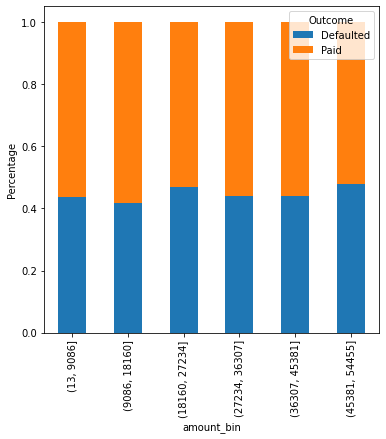

In [44]:
amountBins=np.linspace(min(loanData['Loan amount']),max(loanData['Loan amount']),7,dtype="int")
df=pd.DataFrame()
df['amount_bin']=pd.cut(loanData['Loan amount'],amountBins)
amount_vs_outcome=pd.crosstab(df['amount_bin'],loanData['Outcome'])
amount_vs_outcome.div(amount_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

In [45]:
#################################################################
#################################################################
#################################################################

In [46]:
#################################################################

#     REPLACE CATEGORICAL VALUES WITH NUMERIC VALUES

#################################################################

In [47]:
loanData['Gender'].replace(['F','M'],[0,1],inplace=True)
loanData['Employment status'].replace(['Unemployed','Self Employed','Employed'],[0,1,2],inplace=True)
loanData['Own home'].replace(['Rent','Mortgage','Own'],[0,1,2],inplace=True)
loanData['Outcome'].replace(['Defaulted','Paid'],[0,1],inplace=True)

In [48]:
##############################################################

## Correlate the variables:

<AxesSubplot:>

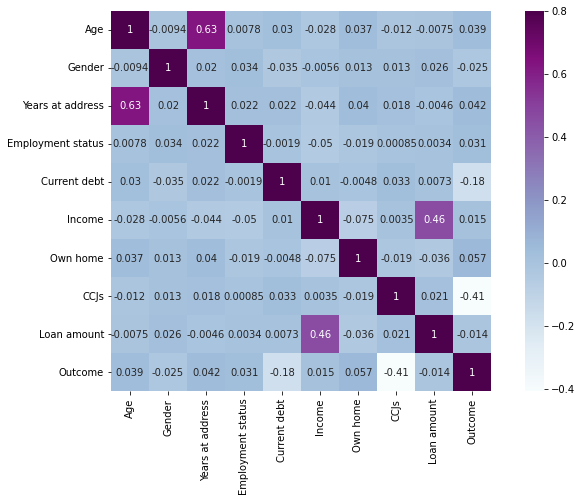

In [49]:
matrix=loanData.corr()
f, ax = plt.subplots(figsize=(12,7))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu",annot=True)

In [50]:
##############################################################

# BEGIN MODELING

## Prepare data

In [51]:
# preprocess data. Convert strings to usable values

le = preprocessing.LabelEncoder()
loanData=loanData.apply(le.fit_transform)

loanData.head()

,Age,Gender,Years at address,Employment status,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,2,0,1,0,0,80,0,1,776,1
1,49,0,12,0,107,24,2,0,333,1
2,31,0,3,1,344,84,0,1,1467,1
3,50,0,46,1,555,60,1,0,1543,1
4,53,1,7,1,726,90,2,0,1683,1


In [52]:

X=loanData.drop(columns='Outcome')
y=loanData['Outcome']

# loanData.isna().sum()

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)



## 1. Logistic regression 

In [93]:
# setup logistic regression model

model=LogisticRegression(max_iter=500)


In [94]:
# train model
model.fit(X_train,y_train)


LogisticRegression(max_iter=500)

0.75
520     0
844     1
766     1
1208    1
216     1
Name: Outcome, dtype: int64
[0 1 1 1 1]


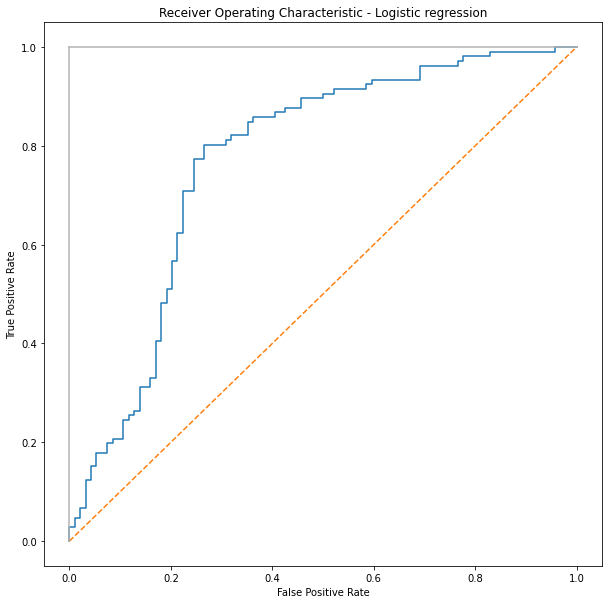

0.771276595744681


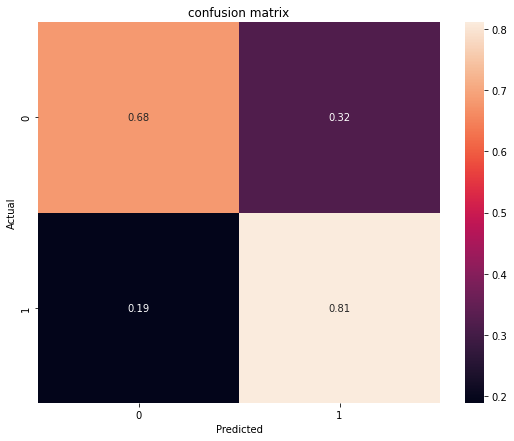

In [147]:
# predict using model

predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
print(score)
print(y_test.head())
print(predictions[:5])

y_pred_probs=model.predict_proba(X_test)[::,1]
l_fpr, l_tpr, _ = roc_curve(y_test,  y_pred_probs)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(l_fpr, l_tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = roc_auc_score(y_test, y_pred_probs)
print(auc)

confData={
    'y_Actual':y_test.to_list(),
    'y_Predicted':predictions.tolist()
}
df = pd.DataFrame(confData, columns=['y_Actual','y_Predicted'])
confusion_matrix=pd.crosstab(df['y_Actual'],df['y_Predicted'],rownames=['Actual'],colnames=['Predicted'])
confusion_matrix=confusion_matrix.div(confusion_matrix.sum(1).astype(float),axis=0)
plt.figure(figsize = (9,7))
sns.heatmap(confusion_matrix,annot=True)
plt.title('confusion matrix')
plt.show()


# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()



# predictions = model2.predict(X_test)
# score = accuracy_score(y_test, predictions)
# print(score)
# print(y_test.head())
# print(predictions[:5])




## 2. Decision Tree 

In [96]:
treeModel=DecisionTreeClassifier(criterion='entropy')


In [97]:
treeModel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

0.705


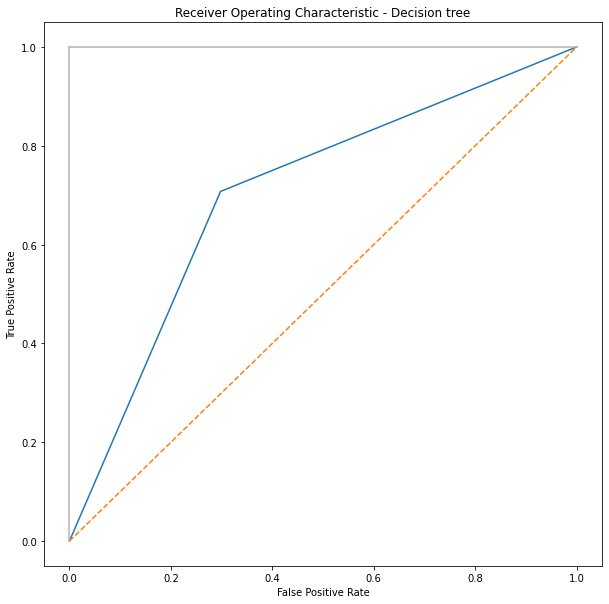

0.7048374146928944


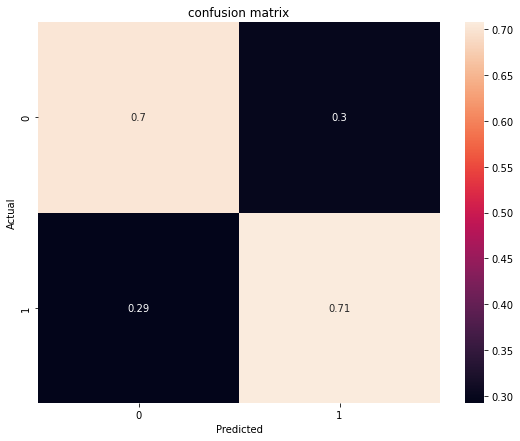

In [148]:
treePredictions = treeModel.predict(X_test)
treeScore = accuracy_score(y_test, treePredictions)
print(treeScore)
# print(y_test.head())
# print(predictions[:5])

y_pred_probs=treeModel.predict_proba(X_test)[::,1]
d_fpr, d_tpr, _ = roc_curve(y_test,  y_pred_probs)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision tree')
plt.plot(d_fpr, d_tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = roc_auc_score(y_test, y_pred_probs)
print(auc)

confData={
    'y_Actual':y_test.to_list(),
    'y_Predicted':treePredictions.tolist()
}
df = pd.DataFrame(confData, columns=['y_Actual','y_Predicted'])
confusion_matrix=pd.crosstab(df['y_Actual'],df['y_Predicted'],rownames=['Actual'],colnames=['Predicted'])
confusion_matrix=confusion_matrix.div(confusion_matrix.sum(1).astype(float),axis=0)
plt.figure(figsize = (9,7))
sns.heatmap(confusion_matrix,annot=True)
plt.title('confusion matrix')
plt.show()

## 3. K-Nearest Neighbors 

In [99]:
knnModel=KNeighborsClassifier(n_neighbors=9)

In [100]:
knnModel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

0.54


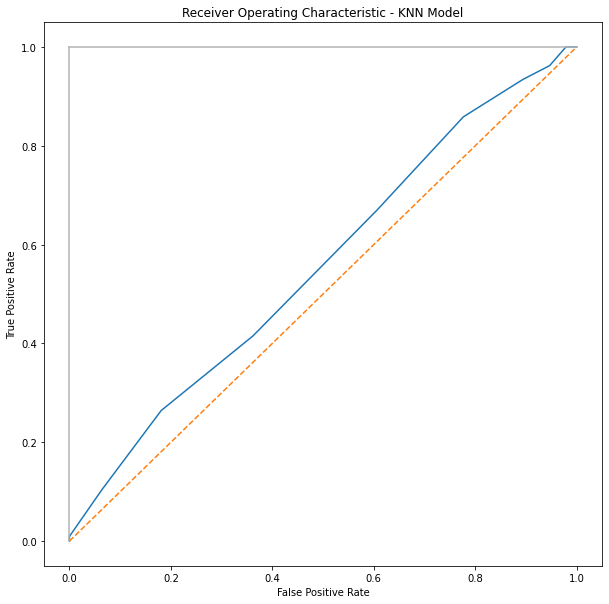

0.5572561220393417


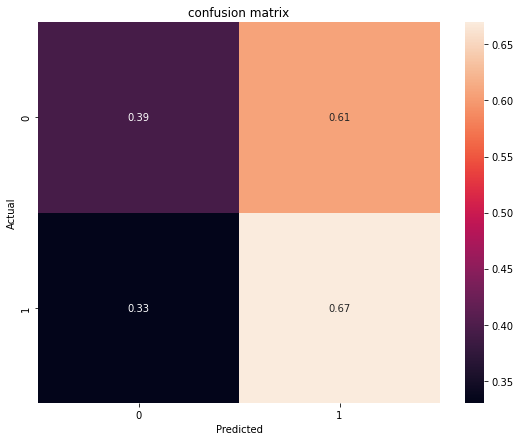

In [149]:
knnPredictions = knnModel.predict(X_test)
knnScore = accuracy_score(y_test, knnPredictions)
print(knnScore)

y_pred_probs=knnModel.predict_proba(X_test)[::,1]
k_fpr, k_tpr, _ = roc_curve(y_test,  y_pred_probs)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN Model')
plt.plot(k_fpr, k_tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = roc_auc_score(y_test, y_pred_probs)
print(auc)

confData={
    'y_Actual':y_test.to_list(),
    'y_Predicted':knnPredictions.tolist()
}
df = pd.DataFrame(confData, columns=['y_Actual','y_Predicted'])
confusion_matrix=pd.crosstab(df['y_Actual'],df['y_Predicted'],rownames=['Actual'],colnames=['Predicted'])
confusion_matrix=confusion_matrix.div(confusion_matrix.sum(1).astype(float),axis=0)
plt.figure(figsize = (9,7))
sns.heatmap(confusion_matrix,annot=True)
plt.title('confusion matrix')
plt.show()

## 4. Support Vector Machine

In [102]:
svmModel=svm.SVC(kernel='linear',probability=True)

In [103]:
svmModel.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

0.765


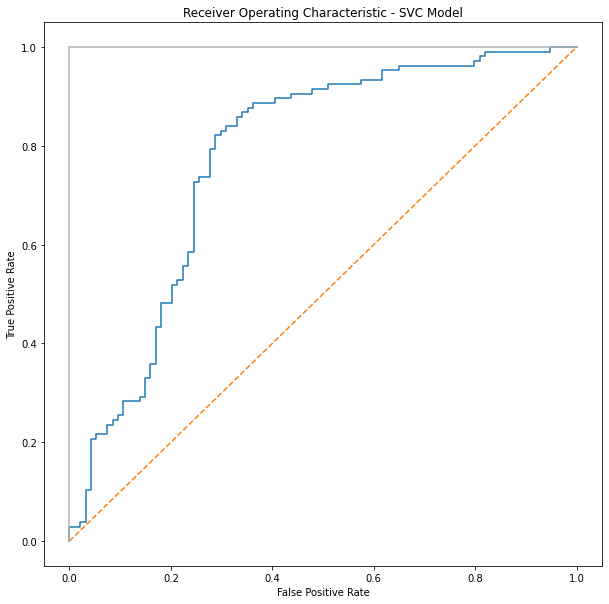

0.7762946607788036


In [104]:
svmPredictions = svmModel.predict(X_test)
svmScore = accuracy_score(y_test, svmPredictions)
print(svmScore)

y_pred_probs=svmModel.predict_proba(X_test)[::,1]
s_fpr, s_tpr, _ = roc_curve(y_test,  y_pred_probs)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVC Model')
plt.plot(s_fpr, s_tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = roc_auc_score(y_test, y_pred_probs)
print(auc)



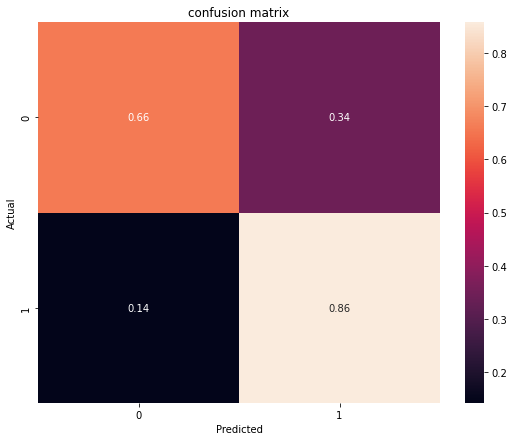

In [150]:
confData={
    'y_Actual':y_test.to_list(),
    'y_Predicted':svmPredictions.tolist()
}
df = pd.DataFrame(confData, columns=['y_Actual','y_Predicted'])
confusion_matrix=pd.crosstab(df['y_Actual'],df['y_Predicted'],rownames=['Actual'],colnames=['Predicted'])
confusion_matrix=confusion_matrix.div(confusion_matrix.sum(1).astype(float),axis=0)
plt.figure(figsize = (9,7))
sns.heatmap(confusion_matrix,annot=True)
plt.title('confusion matrix')
plt.show()

## Combined ROC graph

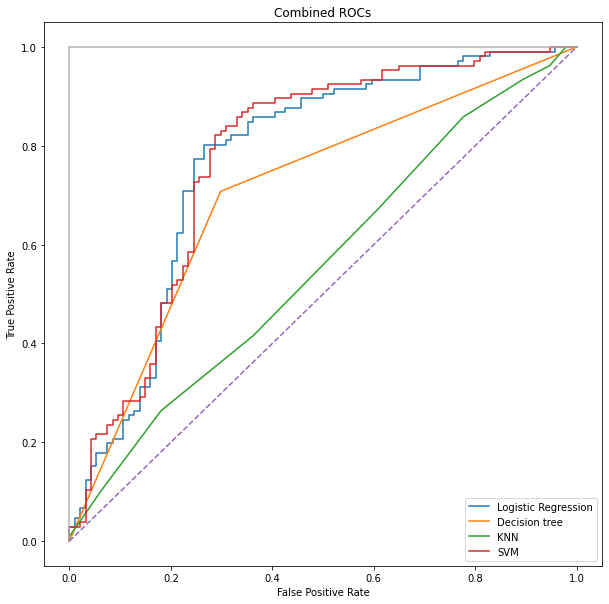

In [137]:
plt.subplots(1, figsize=(10,10))
plt.title('Combined ROCs')
plt.plot(l_fpr, l_tpr,label='Logistic Regression')
plt.plot(d_fpr, d_tpr,label='Decision tree')
plt.plot(k_fpr, k_tpr,label='KNN')
plt.plot(s_fpr, s_tpr,label='SVM')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()